In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

### Questions to answers are

1. Top 25 companies which hires most h1b1 visa applicants
2. Top 25 companies according to their Salary
3. Top 25 States where applicants apply most
4. Top 25 Job Titles
5. Top 25 Job Titles according to Salary
6. Top 25 States which Denys most
7. Growth Increase per year in Number of Applications for h1b visa analysis
8. Growth Rate by year ( Certified h1b1 Visa Applicantes )
9. Deny Rate by Year
10. How many applicantes are not Full Time Job and what is average salaray
11. What is Average Salary of top 25 Companies ( according to number of applicantes)
12. What is Average Salary of top 25 Companies who pay high salaries

In [7]:
df = pd.read_csv("F://python/Advanced python//h1b_kaggle.csv")

In [8]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [9]:
df.shape

(3002458, 11)

In [10]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [11]:
drop_columns = ["Unnamed: 0","FULL_TIME_POSITION","lon","lat"]

for col in drop_columns : 
    df.drop(col,axis=1,inplace=True)

In [12]:
df.drop("SOC_NAME",axis=1,inplace=True)

In [13]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [14]:
df.shape

(3002458, 6)

In [15]:
df.rename(mapper={
    "CASE_STATUS":"STATUS",
    "EMPLOYER_NAME":"COMPANY",
    "PREVAILING_WAGE":"SALARY",
    "WORKSITE":"STATE"
},axis=1,inplace=True)

In [16]:
df.head()

,STATUS,COMPANY,JOB_TITLE,SALARY,YEAR,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI"


In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(3002311, 6)

In [19]:
df[:60000].to_csv('my_visa.csv')

In [20]:
top_company=df['COMPANY'].value_counts()[:25]

In [21]:
top_company

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34214
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17456
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
INTEL CORPORATION                                   11415
TECH MAHINDRA (AMERICAS),INC.                       10732
DELOITTE & TOU

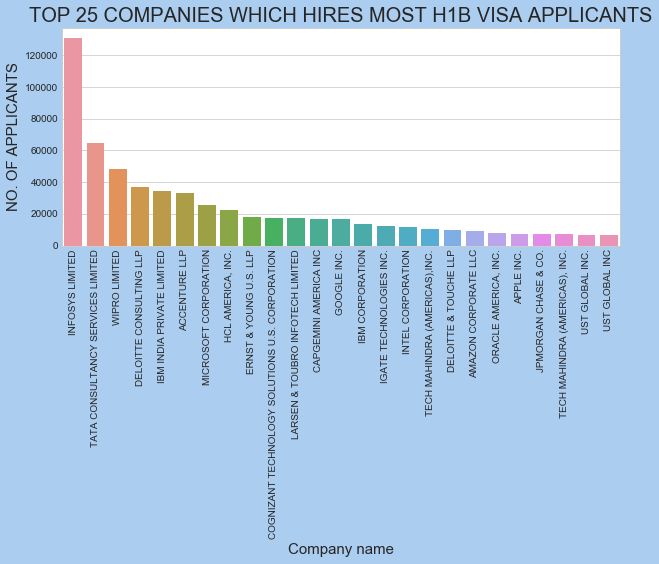

In [22]:
plt.style.use("seaborn-whitegrid")
fig,ax=plt.subplots(figsize=(10,4),facecolor="#ABCDEF")
sns.barplot(top_company.index,top_company.values,ax=ax)
plt.title("TOP 25 COMPANIES WHICH HIRES MOST H1B VISA APPLICANTS",fontsize=20)
plt.xlabel("Company name",fontsize=15)
plt.ylabel("NO. OF APPLICANTS",fontsize=15)
plt.xticks(rotation=90)
plt.savefig("TOP 25 COMPANIES WHICH HIRES MOST H1B VISA APPLICANTS.jpg")
plt.show()

## Top 25 companies according to their Salary

In [23]:
Top_salary = df[['COMPANY','SALARY']].groupby('COMPANY').mean().sort_values(by="SALARY",ascending=False)[:25]
Top_salary

,SALARY
COMPANY,
OMPI OF AMERICA INC.,2.129878e+08
"UROLOGY TODAY, LLC",1.731392e+08
INNOBOX SYSTEMS,1.723634e+08
BAALAAJEE INC.,1.434408e+08
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,1.347021e+08
BAYSHORE GLOBAL MANAGEMENT LLC,1.262358e+08
"MANHATTAN SOFTWARE, INC.",1.239077e+08
GYM-PACT CORP,1.233898e+08
"BOOKRENTER.COM, INC.",1.230321e+08


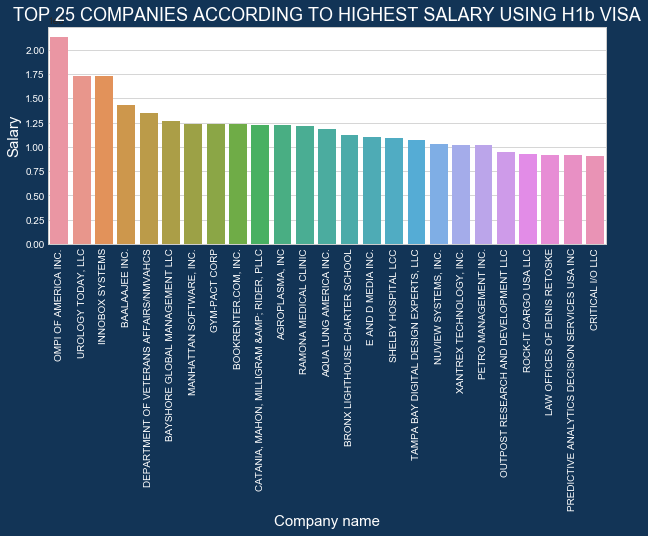

In [24]:
fig,ax = plt.subplots(figsize=(10,4),facecolor="#123456")
sns.barplot(x=Top_salary.index,y=Top_salary['SALARY'],ax=ax)
plt.title("TOP 25 COMPANIES ACCORDING TO HIGHEST SALARY USING H1b VISA",color="white",fontsize=18)
plt.xlabel("Company name",color="white",fontsize=15)
plt.ylabel("Salary",color = "white",fontsize=15)
plt.xticks(rotation=90,color="white")
plt.yticks(color="white")
plt.savefig("TOP 25 COMPANIES ACCORDING TO HIGHEST SALARY USING H1b VISA")
plt.show()

## Top 25 States where applicants apply most

In [25]:
Top_states = df["STATE"].value_counts(ascending=False)[:25]
Top_states

NEW YORK, NEW YORK                  191708
HOUSTON, TEXAS                       83886
SAN FRANCISCO, CALIFORNIA            62783
ATLANTA, GEORGIA                     52193
CHICAGO, ILLINOIS                    51495
SAN JOSE, CALIFORNIA                 50080
SUNNYVALE, CALIFORNIA                35135
DALLAS, TEXAS                        31623
BOSTON, MASSACHUSETTS                31471
REDMOND, WASHINGTON                  30665
CHARLOTTE, NORTH CAROLINA            30265
MOUNTAIN VIEW, CALIFORNIA            29479
IRVING, TEXAS                        29391
SAN DIEGO, CALIFORNIA                28881
SANTA CLARA, CALIFORNIA              28167
JERSEY CITY, NEW JERSEY              27022
AUSTIN, TEXAS                        26865
SEATTLE, WASHINGTON                  26858
LOS ANGELES, CALIFORNIA              26516
PHILADELPHIA, PENNSYLVANIA           24161
PHOENIX, ARIZONA                     21520
BELLEVUE, WASHINGTON                 21306
PLANO, TEXAS                         20741
WASHINGTON,

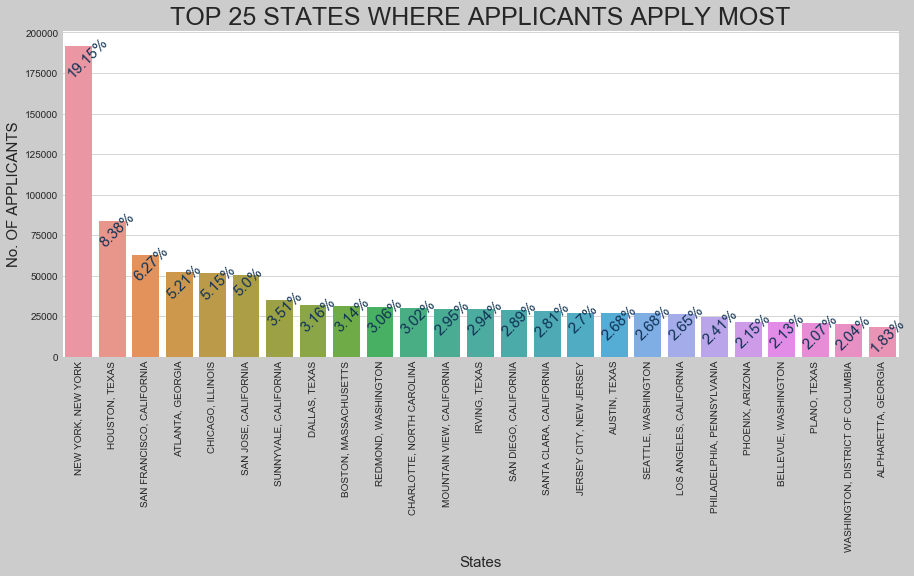

In [26]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(15,6),facecolor="#cccccc")
sns.barplot(x=Top_states.index,y=Top_states.values,ax=ax)
plt.title("TOP 25 STATES WHERE APPLICANTS APPLY MOST",fontsize=25)
plt.xlabel("States",fontsize=15)
plt.ylabel("No. OF APPLICANTS",fontsize=15)
plt.xticks(rotation=90)

totals=[]

for p in ax.patches:
    totals.append(p.get_height())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+10, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#123456',rotation=45)
plt.savefig("TOP 25 STATES WHERE APPLICANTS APPLY MOST.jpg")
plt.show()

## Top 25 Job Titles

In [27]:
job_titles=df.JOB_TITLE.value_counts().sort_values(ascending=False).head(25)

In [28]:
job_titles

PROGRAMMER ANALYST             249032
SOFTWARE ENGINEER              121303
COMPUTER PROGRAMMER             70569
SYSTEMS ANALYST                 61964
SOFTWARE DEVELOPER              42906
BUSINESS ANALYST                39680
COMPUTER SYSTEMS ANALYST        35083
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24903
CONSULTANT                      23080
PHYSICAL THERAPIST              20206
PROJECT MANAGER                 20170
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13633
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
Name: JOB_TITLE, dtype: int64

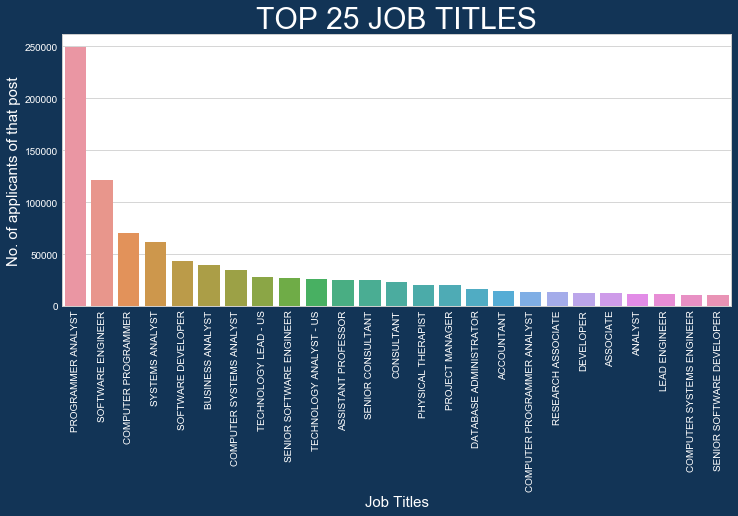

In [31]:
plt.style.use("seaborn-whitegrid")
fig,ax = plt.subplots(figsize=(12,5),facecolor="#123456")
sns.barplot(x=job_titles.index,y=job_titles.values,ax=ax)
plt.title("TOP 25 JOB TITLES",color="white",fontsize=30)
plt.xlabel("Job Titles",color="white",fontsize=15)
plt.ylabel("No. of applicants of that post",color="white",fontsize=15)
plt.xticks(color="white",rotation=90)
plt.yticks(color="white")
plt.savefig("TOP 25 JOB TITLES.jpg")
plt.show()

## Top 25 job titles according to salary

In [32]:
title = df[['JOB_TITLE','SALARY']].groupby('JOB_TITLE').mean().sort_values(by='SALARY',ascending=False)[:25]
title

,SALARY
JOB_TITLE,
"DIRECTOR, SOCIAL AND DIGITAL MEDIA",3.291392e+08
HOSPITALIST (INTERNAL MEDICING,2.980016e+08
DIRECTOR OF SRCH ENGINE OPTMZTN/SRCH ENGINE MKTNG,2.459371e+08
"ASSOCIATE DIRECTOR, HEALTH ECONOMICS AND OUTCOMES",2.214243e+08
PROGRAM MANAGER (POSITIVE PATHWAYS),2.193356e+08
"AREA MANAGER, PHARMACEUTICAL PACKAGING",2.129878e+08
ASSOCIATE MED. DIRECTOR & HOSPICE/PALLIATIVE CARE,2.093180e+08
SR. WEB INFRASTRUCTURE CONSULT,2.080125e+08
PROGRAMMER ANALYST/SAP SRM ANALYST,2.071056e+08


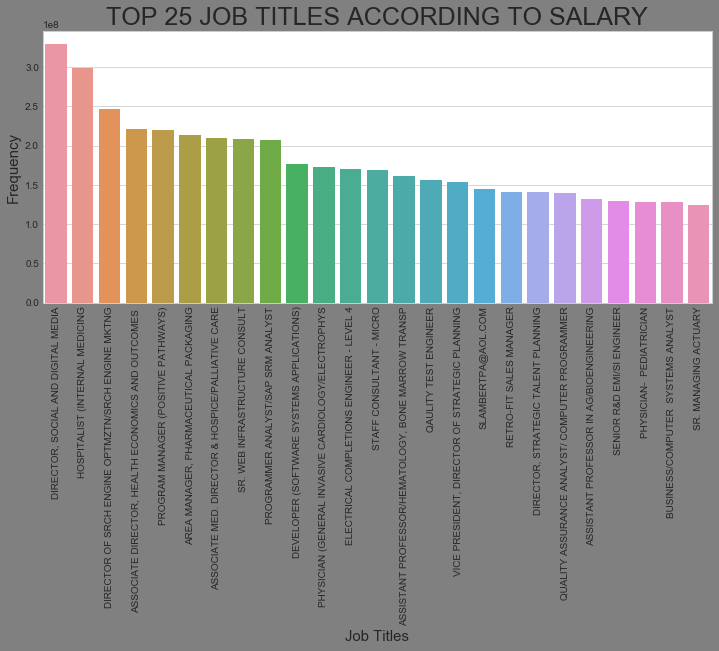

In [33]:
fig,ax = plt.subplots(figsize=(12,5),facecolor="gray")
sns.barplot(x=title.index,y=title['SALARY'],ax=ax)
plt.title("TOP 25 JOB TITLES ACCORDING TO SALARY",fontsize=25)
plt.xlabel("Job Titles",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xticks(rotation=90)
plt.savefig("TOP 25 JOB TITLES ACCORDING TO SALARY.jpg")
plt.show()

In [34]:
df.head()

,STATUS,COMPANY,JOB_TITLE,SALARY,YEAR,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,"ANN ARBOR, MICHIGAN"
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,"PLANO, TEXAS"
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,"DENVER, COLORADO"
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,"ST. LOUIS, MISSOURI"


## Top 25 States which Denys most

In [35]:
deny = df[df['STATUS']=='DENIED']
deny = deny['STATE'].value_counts()[:25]
deny

NEW YORK, NEW YORK                  7638
HOUSTON, TEXAS                      2594
SAN FRANCISCO, CALIFORNIA           1759
LOS ANGELES, CALIFORNIA             1646
CHICAGO, ILLINOIS                   1513
MIAMI, FLORIDA                      1220
SAN JOSE, CALIFORNIA                1063
WASHINGTON, DISTRICT OF COLUMBIA    1049
ATLANTA, GEORGIA                    1039
BROOKLYN, NEW YORK                   976
BOSTON, MASSACHUSETTS                946
DALLAS, TEXAS                        845
SAN DIEGO, CALIFORNIA                784
AUSTIN, TEXAS                        679
PHILADELPHIA, PENNSYLVANIA           604
SEATTLE, WASHINGTON                  595
SANTA CLARA, CALIFORNIA              583
JERSEY CITY, NEW JERSEY              543
SUNNYVALE, CALIFORNIA                511
IRVINE, CALIFORNIA                   486
MOUNTAIN VIEW, CALIFORNIA            479
IRVING, TEXAS                        448
CHARLOTTE, NORTH CAROLINA            446
PALO ALTO, CALIFORNIA                391
PHOENIX, ARIZONA

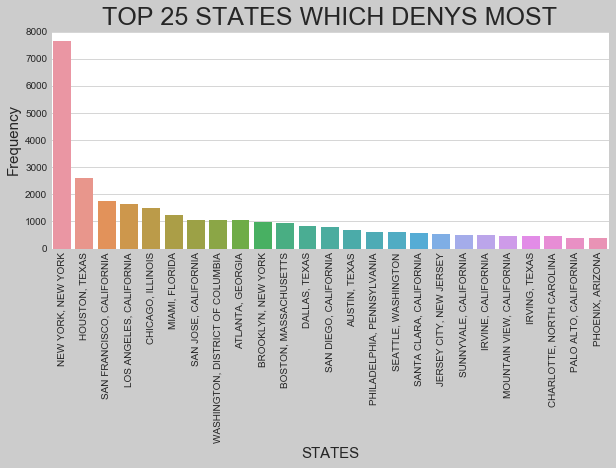

In [36]:
fig,ax = plt.subplots(figsize=(10,4),facecolor="#cccccc")
sns.barplot(x=deny.index,y=deny.values,ax=ax)
plt.title("TOP 25 STATES WHICH DENYS MOST",fontsize=25)
plt.xlabel("STATES",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xticks(rotation=90)
plt.savefig("TOP 25 STATES WHICH DENYS MOST.jpg")
plt.show()

In [36]:
l = list(df['STATE'][:25].unique())
l.sort()
print(l)

['ALEXANDRIA, VIRGINIA', 'ANN ARBOR, MICHIGAN', 'CHULA VISTA, CALIFORNIA', 'COMMERCE, CALIFORNIA', 'DENVER, COLORADO', 'FAIRHAVEN, MASSACHUSETTS', 'GREENWOOD VILLAGE, COLORADO', 'HOUSTON, TEXAS', 'JERSEY CITY, NEW JERSEY', 'LOS ANGELES, CALIFORNIA', 'MEMPHIS, TEXAS', 'MIAMI, FLORIDA', 'MIDLAND, MICHIGAN', 'PITTSBURGH, PENNSYLVANIA', 'PLANO, TEXAS', 'SAN DIEGO, CALIFORNIA', 'SAN JOSE, CALIFORNIA', 'SANTA CLARA, CALIFORNIA', 'ST. LOUIS, MISSOURI', 'STERLING, VIRGINIA', 'VIENNA, VIRGINIA', 'WAUKESHA, WISCONSIN']


In [38]:
df.loc[:,'STATE'].head()

0        ANN ARBOR, MICHIGAN
1               PLANO, TEXAS
2    JERSEY CITY, NEW JERSEY
3           DENVER, COLORADO
4        ST. LOUIS, MISSOURI
Name: STATE, dtype: object

In [39]:
df.columns

Index(['STATUS', 'COMPANY', 'JOB_TITLE', 'SALARY', 'YEAR', 'STATE'], dtype='object')

In [41]:
df.loc[:,'STATE'] = df.loc[:,'STATE'].apply(lambda s : s.split(',')[1][1:])

In [42]:
df.head()

,STATUS,COMPANY,JOB_TITLE,SALARY,YEAR,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067.0,2016.0,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674.0,2016.0,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066.0,2016.0,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314.0,2016.0,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518.4,2016.0,MISSOURI


In [ ]:
def change_NA(rec):
    if (rec == 'NA') : 
        return 'MARIANA ISLANDS'
    return rec
df.loc[:,'STATE'] = df.loc[:,'STATE'].apply(lambda rec : change_NA(rec))
print(len(df.loc[:,'WORKSITE'].unique()))

In [51]:
from decimal import Decimal
df['YEAR'] = df['YEAR'].apply(lambda year:'%g'%(Decimal(str(year))))
df['SALARY'] = df['SALARY'].apply(lambda wage:'%g'%(Decimal(str(wage))))

In [52]:
df.head()

,STATUS,COMPANY,JOB_TITLE,SALARY,YEAR,STATE
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,POSTDOCTORAL RESEARCH FELLOW,36067,2016,MICHIGAN
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF OPERATING OFFICER,242674,2016,TEXAS
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF PROCESS OFFICER,193066,2016,NEW JERSEY
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...","REGIONAL PRESIDEN, AMERICAS",220314,2016,COLORADO
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,PRESIDENT MONGOLIA AND INDIA,157518,2016,MISSOURI


In [53]:
df['STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

# Calculating the petitions distributions by status

In [37]:
status_freq = [0]*7
statuses = ['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
for i in range(0,7):
    status_freq[i] = df[df.STATUS==statuses[i]]['STATUS'].count()
status_freq

[202659, 89746, 2615609, 94279, 2, 1, 15]

In [38]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

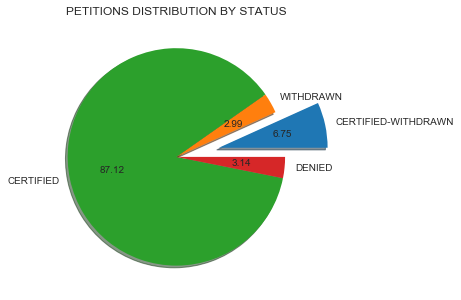

In [39]:
plt.figure(figsize=(5,5))
plt.title("PETITIONS DISTRIBUTION BY STATUS")
axis('equal')
e = [0.4,0,0,0]
plt.pie(status_freq[:4],labels=statuses[:4],explode=e,shadow=True,autopct="%.2f")
show()

# Calculating the petitions distributions by year

In [44]:
df['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.])

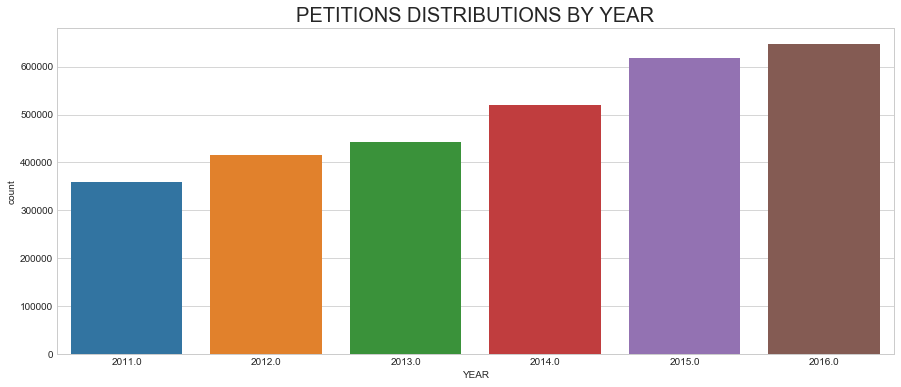

In [47]:
plt.figure(figsize=(15,6))
plt.title("PETITIONS DISTRIBUTIONS BY YEAR",fontsize=20)
sns.countplot(df['YEAR'])
plt.show()